In [2]:
import pandas as pd

# Load CSV data
file_path = 'csv/trippub.csv'
data = pd.read_csv(file_path)

#REFRENCE CODES: https://nhts.ornl.gov/assets/2017/doc/codebook_v1.2.pdf


# Display basic information about the dataset
print("Number of rows and columns:", data.shape)

Number of rows and columns: (923572, 115)


In [3]:
# Display the first 50 columns
print("First 50 columns:", data.columns[:50])

# Display the next 50 columns
print("\nNext 50 columns:", data.columns[50:100])

# Display the remaining columns
print("\nRemaining columns:", data.columns[100:])

First 50 columns: Index(['HOUSEID', 'PERSONID', 'TDTRPNUM', 'STRTTIME', 'ENDTIME', 'TRVLCMIN',
       'TRPMILES', 'TRPTRANS', 'TRPACCMP', 'TRPHHACC', 'VEHID', 'TRWAITTM',
       'NUMTRANS', 'TRACCTM', 'DROP_PRK', 'TREGRTM', 'WHODROVE', 'WHYFROM',
       'LOOP_TRIP', 'TRPHHVEH', 'HHMEMDRV', 'HH_ONTD', 'NONHHCNT', 'NUMONTRP',
       'PSGR_FLG', 'PUBTRANS', 'TRIPPURP', 'DWELTIME', 'TDWKND', 'VMT_MILE',
       'DRVR_FLG', 'WHYTRP1S', 'ONTD_P1', 'ONTD_P2', 'ONTD_P3', 'ONTD_P4',
       'ONTD_P5', 'ONTD_P6', 'ONTD_P7', 'ONTD_P8', 'ONTD_P9', 'ONTD_P10',
       'ONTD_P11', 'ONTD_P12', 'ONTD_P13', 'TDCASEID', 'TRACC_WLK',
       'TRACC_POV', 'TRACC_BUS', 'TRACC_CRL'],
      dtype='object')

Next 50 columns: Index(['TRACC_SUB', 'TRACC_OTH', 'TREGR_WLK', 'TREGR_POV', 'TREGR_BUS',
       'TREGR_CRL', 'TREGR_SUB', 'TREGR_OTH', 'WHYTO', 'TRAVDAY', 'HOMEOWN',
       'HHSIZE', 'HHVEHCNT', 'HHFAMINC', 'DRVRCNT', 'HHSTATE', 'HHSTFIPS',
       'NUMADLT', 'WRKCOUNT', 'TDAYDATE', 'HHRESP', 'LIF_CYC', 'MSACA

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
print("\nHead of data", data.head())


Head of data     HOUSEID  PERSONID  TDTRPNUM  STRTTIME  ENDTIME  TRVLCMIN  TRPMILES  TRPTRANS  TRPACCMP  TRPHHACC  VEHID  TRWAITTM  NUMTRANS  TRACCTM  DROP_PRK  TREGRTM  WHODROVE  WHYFROM  LOOP_TRIP  TRPHHVEH  HHMEMDRV  HH_ONTD  NONHHCNT  NUMONTRP  PSGR_FLG  PUBTRANS TRIPPURP  DWELTIME  TDWKND  VMT_MILE  DRVR_FLG  WHYTRP1S  ONTD_P1  ONTD_P2  ONTD_P3  ONTD_P4  ONTD_P5  ONTD_P6  ONTD_P7  ONTD_P8  ONTD_P9  ONTD_P10  ONTD_P11  ONTD_P12  ONTD_P13      TDCASEID  TRACC_WLK  TRACC_POV  TRACC_BUS  TRACC_CRL  TRACC_SUB  TRACC_OTH  TREGR_WLK  TREGR_POV  TREGR_BUS  TREGR_CRL  TREGR_SUB  TREGR_OTH  WHYTO  TRAVDAY  HOMEOWN  HHSIZE  HHVEHCNT  HHFAMINC  DRVRCNT HHSTATE  HHSTFIPS  NUMADLT  WRKCOUNT  TDAYDATE  HHRESP  LIF_CYC  MSACAT  MSASIZE  RAIL  URBAN  URBANSIZE  URBRUR  GASPRICE  CENSUS_D  CENSUS_R  CDIVMSAR  HH_RACE  HH_HISP HH_CBSA  SMPLSRCE  R_AGE  EDUC  R_SEX  PRMACT  PROXY  WORKER  DRIVER      WTTRDFIN  WHYTRP90   TRPMILAD  R_AGE_IMP  R_SEX_IMP  VEHTYPE OBHUR DBHUR  OTHTNRNT  OTPPOPDN  OTRESD

In [5]:
import matplotlib.pyplot as plt


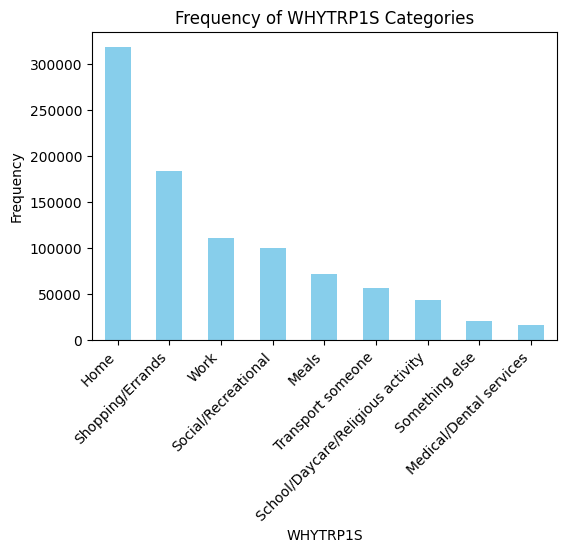

In [6]:
#Visualization and examination of target features
# whytrip1s = data['WHYTRP1S'].value_counts()
# print(data['WHYTRP1S'].value_counts())
whytrip1s_map_to_string = {
    '1':'Home', 
    '10':'Work', 
    '20':'School/Daycare/Religious activity',
    '30':'Medical/Dental services',
    '40':'Shopping/Errands',
    '50':'Social/Recreational',
    '70':'Transport someone',
    '80':'Meals',
    '97':'Something else'
}
whytrip1s = data['WHYTRP1S'].astype(str).map(whytrip1s_map_to_string).value_counts()

# print(whytrip1s)
plt.figure(figsize=(6, 4))
whytrip1s.plot(kind='bar', color='skyblue')
plt.title('Frequency of WHYTRP1S Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [8]:
#Columns to be dropped: WHYTO, WHYFROM, TRIPPURP, WHYTRP1S, WHYTRP90
columns_to_drop = ['WHYTO', 'WHYFROM', 'TRIPPURP', 'WHYTRP1S', 'WHYTRP90']

# Separate features and target variable
target_var = 'WHYTRP1S'

X = data.drop(columns=columns_to_drop)
y = data[target_var]

print(X.columns)
print(y)


Index(['HOUSEID', 'PERSONID', 'TDTRPNUM', 'STRTTIME', 'ENDTIME', 'TRVLCMIN',
       'TRPMILES', 'TRPTRANS', 'TRPACCMP', 'TRPHHACC',
       ...
       'OBHTNRNT', 'OBPPOPDN', 'OBRESDN', 'DTHTNRNT', 'DTPPOPDN', 'DTRESDN',
       'DTEEMPDN', 'DBHTNRNT', 'DBPPOPDN', 'DBRESDN'],
      dtype='object', length=110)
0         20
1          1
2          1
3         10
4         20
          ..
923567    10
923568    50
923569    10
923570    40
923571     1
Name: WHYTRP1S, Length: 923572, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
print(sum(data.isnull().sum()))
#total missing features across all columns

0


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923572 entries, 0 to 923571
Columns: 115 entries, HOUSEID to DBRESDN
dtypes: float64(5), int64(105), object(5)
memory usage: 810.3+ MB
None


In [12]:
#Columns to be dropped: WHYTO, WHYFROM, TRIPPURP, WHYTRP1S, WHYTRP90
columns_to_drop = ['WHYTO', 'WHYFROM', 'TRIPPURP', 'WHYTRP1S', 'WHYTRP90']

# Separate features and target variable
target_var = 'WHYTRP1S'

X = data.drop(columns=columns_to_drop)
y = data[target_var]

#drop categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

X_clean = X.drop(columns=categorical_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7084048398884768


<Figure size 1200x600 with 0 Axes>

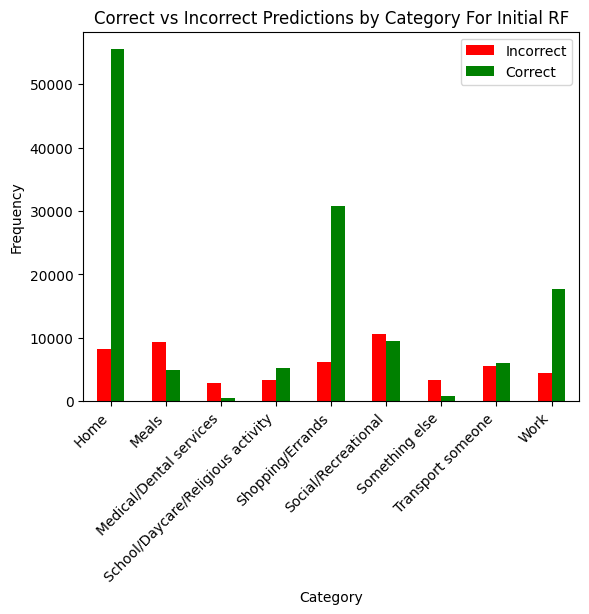

In [24]:
# Create a DataFrame with true labels, predicted labels, correctness indicator, and category
results_df = pd.DataFrame({
    'True_Labels': y_test,
    'Predicted_Labels': y_pred,
    'Correct': y_test == y_pred,
    'Category': y_test.astype(str).map(whytrip1s_map_to_string)
})

# Group by category and correctness, count occurrences
grouped_results = results_df.groupby(['Category', 'Correct']).size().unstack()

# Plot grouped bar graph
plt.figure(figsize=(12, 6))
grouped_results.plot(kind='bar', stacked=False, color=['red', 'green'])
plt.title('Correct vs Incorrect Predictions by Category For Initial RF')
plt.ylabel('Frequency')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.legend(['Incorrect', 'Correct'])
plt.show()

Category
Home                                  8242
Meals                                 9344
Medical/Dental services               2810
School/Daycare/Religious activity     3301
Shopping/Errands                      6228
Social/Recreational                  10558
Something else                        3349
Transport someone                     5532
Work                                  4498
Name: False, dtype: int64

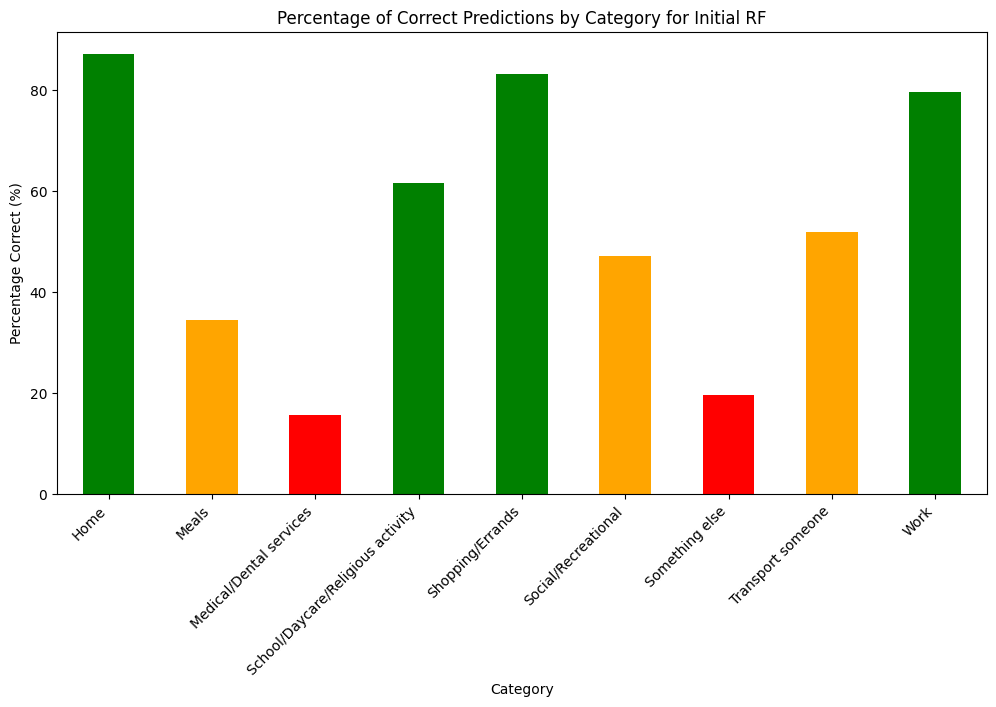

In [40]:
# Calculate the percentage of correct predictions for each category
grouped_results['Percent_Correct'] = (grouped_results[True] / (grouped_results[True] + grouped_results[False]))*100
color_mapping = {
    'red': lambda x: x < 20,
    'orange': lambda x: 20 <= x <= 60,
    'green': lambda x: x > 60
}
colors = [next(key for key, condition in color_mapping.items() if condition(percent)) for percent in grouped_results['Percent_Correct']]

# Plot bar graph for percentage of correct predictions
plt.figure(figsize=(12, 6))
grouped_results['Percent_Correct'].plot(kind='bar', color=colors)
plt.title('Percentage of Correct Predictions by Category for Initial RF')
plt.ylabel('Percentage Correct (%)')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.show()

In [43]:
# Display feature importances
feature_importances = pd.DataFrame({'Feature': X_clean.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

ten_best_features = feature_importances.head(10)
print("Ten Best Features:\n", ten_best_features)

Ten Best Features:
       Feature  Importance
25   DWELTIME    0.207311
3    STRTTIME    0.049373
4     ENDTIME    0.045669
2    TDTRPNUM    0.034461
88   TRPMILAD    0.024550
6    TRPMILES    0.024391
89  R_AGE_IMP    0.021774
80      R_AGE    0.021024
87   WTTRDFIN    0.020838
42   TDCASEID    0.019422


In [49]:
import numpy as np

In [51]:
# Assuming top_features is a DataFrame with the top 10 features
top_features_names = ten_best_features['Feature'].tolist()

# Select the top 10 features from the original data
top_features_data = X_clean[top_features_names]

# Concatenate the features and labels for the correlation matrix
correlation_data = pd.concat([top_features_data, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print("Correlation Matrix for Top 10 Features:")
correlation_matrix.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

Correlation Matrix for Top 10 Features:


,DWELTIME,STRTTIME,ENDTIME,TDTRPNUM,TRPMILAD,TRPMILES,R_AGE_IMP,R_AGE,WTTRDFIN,TDCASEID,WHYTRP1S
DWELTIME,1.00,-0.45,-0.44,-0.28,-0.00,-0.00,-0.13,-0.13,0.02,0.00,-0.14
STRTTIME,-0.45,1.00,0.97,0.53,-0.02,-0.02,-0.06,-0.06,0.01,-0.01,-0.08
ENDTIME,-0.44,0.97,1.00,0.51,0.02,0.02,-0.05,-0.05,0.01,-0.01,-0.08
TDTRPNUM,-0.28,0.53,0.51,1.00,-0.03,-0.03,0.06,0.06,-0.02,-0.02,-0.06
TRPMILAD,-0.00,-0.02,0.02,-0.03,1.00,1.00,0.00,0.00,-0.01,-0.00,0.05
TRPMILES,-0.00,-0.02,0.02,-0.03,1.00,1.00,0.00,0.00,-0.00,-0.00,0.05
R_AGE_IMP,-0.13,-0.06,-0.05,0.06,0.00,0.00,1.00,0.99,-0.17,0.01,0.05
R_AGE,-0.13,-0.06,-0.05,0.06,0.00,0.00,0.99,1.00,-0.17,0.01,0.05
WTTRDFIN,0.02,0.01,0.01,-0.02,-0.01,-0.00,-0.17,-0.17,1.00,-0.02,-0.01
TDCASEID,0.00,-0.01,-0.01,-0.02,-0.00,-0.00,0.01,0.01,-0.02,1.00,-0.01


In [67]:
# Obtain fresh data
data = pd.read_csv(file_path)
print('Original data shape:', data.shape)

#Columns to be dropped: WHYTO, WHYFROM, TRIPPURP, WHYTRP1S, WHYTRP90
columns_to_drop = ['WHYTO', 'WHYFROM', 'TRIPPURP', 'WHYTRP1S', 'WHYTRP90']

# Separate features and target variable
target_var = 'WHYTRP1S'
y = data[target_var]

# Drop the columns that give the answer
X_clean = data.drop(columns=columns_to_drop)

#Encode categorical columns
categorical_columns = X_clean.select_dtypes(include=['object']).columns
X_clean = pd.get_dummies(X_clean, columns=categorical_columns, drop_first=False)

print('Categorical cols encoded:', categorical_columns)
print('Categoricals encoded shape:', X_clean.shape)


Original data shape: (923572, 115)
Categorical cols encoded: Index(['HHSTATE', 'HH_CBSA', 'OBHUR', 'DBHUR'], dtype='object')
Categoricals encoded shape: (923572, 222)


In [68]:
#Remove redundant/irrelevant variables in the top ten most important and retrain the model
redundant_cols=['TRPMILAD', 'R_AGE', 'TDCASEID']
X_clean = X_clean.drop(columns=redundant_cols)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)



In [69]:
# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6944265490079311


In [71]:
from sklearn.model_selection import GridSearchCV

In [76]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, verbose=2, n_jobs=3)
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  1.2min


building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200building tree 47 of 200

building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80

[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  5.0min


building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200


[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:  6.4min finished


RandomForestClassifier(n_estimators=200, n_jobs=3, verbose=2)

In [77]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    3.6s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   15.6s


Accuracy: 0.6988225103537883


[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:   20.6s finished


In [78]:
# Train the Random Forest model
rf_model_no_max_features = RandomForestClassifier(max_features=None, verbose=3, n_jobs=3)
rf_model_no_max_features.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 10.7min


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed: 41.9min finished


RandomForestClassifier(max_features=None, n_jobs=3, verbose=3)

In [79]:
# Make predictions on the test set
y_pred_no_max_features = rf_model_no_max_features.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_no_max_features)
print("Accuracy:", accuracy)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    2.2s


Accuracy: 0.7194055707441194


[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    7.7s finished


In [80]:
# Create a DataFrame with true labels, predicted labels, correctness indicator, and category
results_no_max_features_df = pd.DataFrame({
    'True_Labels': y_test,
    'Predicted_Labels': y_pred_no_max_features,
    'Correct': y_test == y_pred_no_max_features,
    'Category': y_test.astype(str).map(whytrip1s_map_to_string)
})

# Group by category and correctness, count occurrences
grouped_results_no_max_features = results_no_max_features_df.groupby(['Category', 'Correct']).size().unstack()

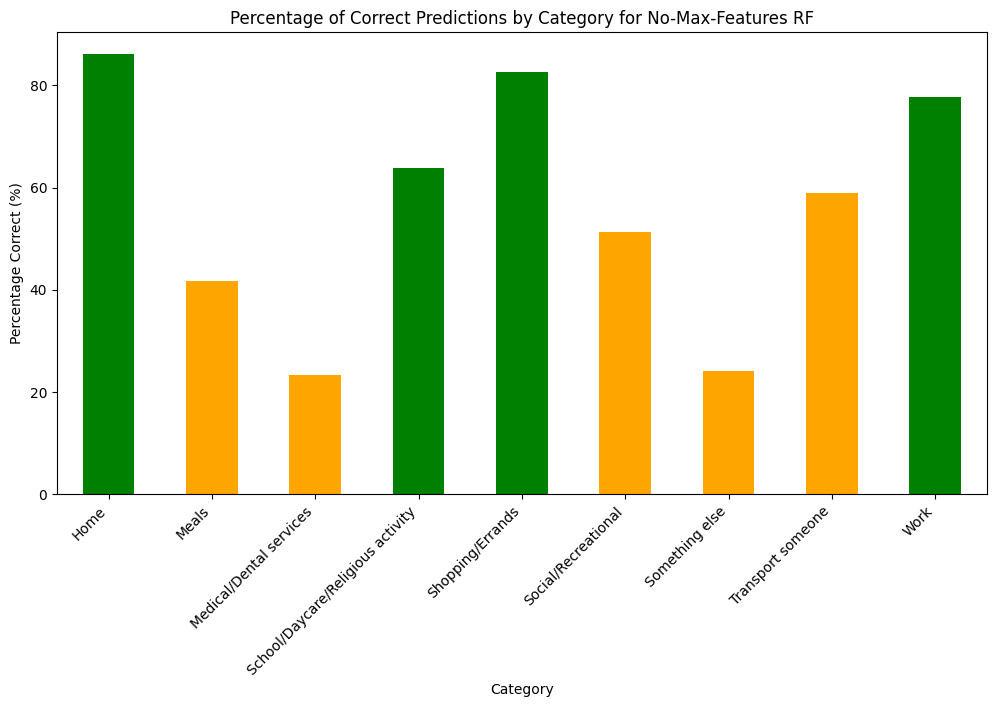

In [82]:
# Calculate the percentage of correct predictions for each category
grouped_results_no_max_features['Percent_Correct'] = (grouped_results_no_max_features[True] / (grouped_results_no_max_features[True] + grouped_results_no_max_features[False]))*100
color_mapping = {
    'red': lambda x: x < 20,
    'orange': lambda x: 20 <= x <= 60,
    'green': lambda x: x > 60
}
colors = [next(key for key, condition in color_mapping.items() if condition(percent)) for percent in grouped_results_no_max_features['Percent_Correct']]

# Plot bar graph for percentage of correct predictions
plt.figure(figsize=(12, 6))
grouped_results_no_max_features['Percent_Correct'].plot(kind='bar', color=colors)
plt.title('Percentage of Correct Predictions by Category for No-Max-Features RF')
plt.ylabel('Percentage Correct (%)')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.show()

In [83]:
grouped_results_no_max_features

Correct,False,True,Percent_Correct
Category,,,
Home,8871,54893,86.087761
Meals,8314,5965,41.774634
Medical/Dental services,2557,777,23.305339
School/Daycare/Religious activity,3104,5499,63.919563
Shopping/Errands,6424,30529,82.615755
Social/Recreational,9724,10267,51.358111
Something else,3161,1009,24.196643
Transport someone,4732,6768,58.852174
Work,4943,17178,77.654717


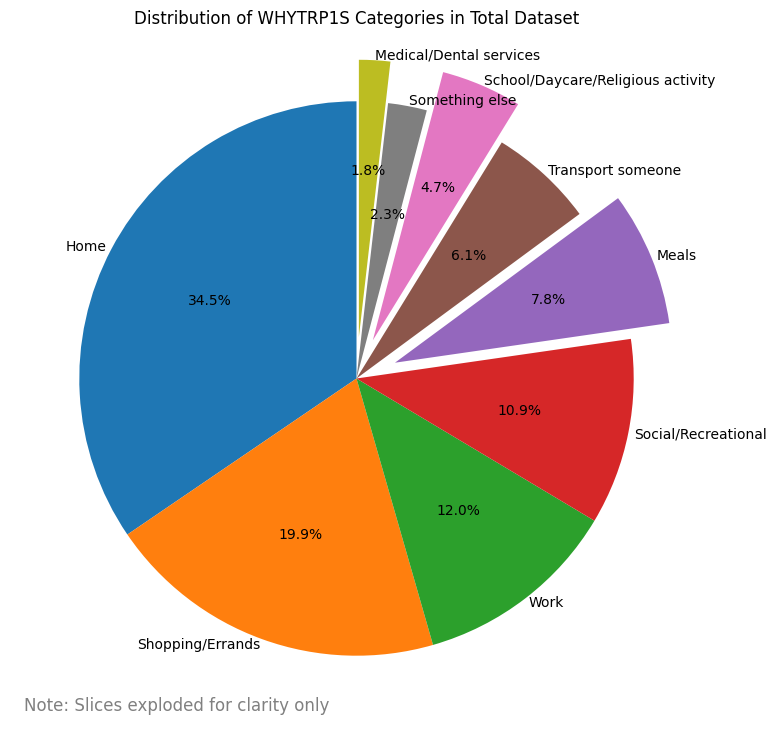

In [111]:
target_variable = 'WHYTRP1S'

# Count the occurrences of each category in the total dataset
whytrip1s_map_to_string = {
    '1':'Home', 
    '10':'Work', 
    '20':'School/Daycare/Religious activity',
    '30':'Medical/Dental services',
    '40':'Shopping/Errands',
    '50':'Social/Recreational',
    '70':'Transport someone',
    '80':'Meals',
    '97':'Something else'
}
whytrip1s_counts_total = data['WHYTRP1S'].astype(str).map(whytrip1s_map_to_string).value_counts()

# Plotting the pie chart
plt.figure(figsize=(9, 9))
explode = (0, 0, 0, 0, 0.15, 0, 0.15, 0, 0.15)  # Adjust the values based on your data
plt.pie(whytrip1s_counts_total, labels=whytrip1s_counts_total.index, autopct='%1.1f%%', startangle=90, labeldistance=1.02, explode=explode)
plt.title(f'Distribution of {target_variable} Categories in Total Dataset')
note_text = "Note: Slices exploded for clarity only"
plt.annotate(note_text, xy=(0.02, 0.02), xycoords='axes fraction', fontsize=12, color='gray')
plt.show()

613493 310079


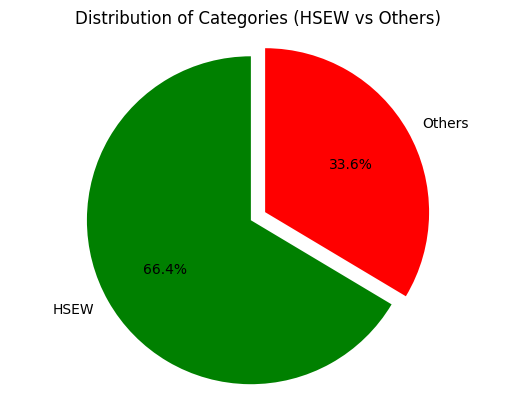

In [116]:
whytrip1s_map_to_string = {
    '1':'Home', 
    '10':'Work', 
    '20':'School/Daycare/Religious activity',
    '30':'Medical/Dental services',
    '40':'Shopping/Errands',
    '50':'Social/Recreational',
    '70':'Transport someone',
    '80':'Meals',
    '97':'Something else'
}
whytrip1s_counts_total = data['WHYTRP1S'].astype(str).map(whytrip1s_map_to_string).value_counts()
whytrip1s_counts_total
hsew = whytrip1s_counts_total['Home'] + whytrip1s_counts_total['Shopping/Errands'] + whytrip1s_counts_total['Work']
others = whytrip1s_counts_total.sum() - hsew
print(hsew, others)

labels = ['HSEW', 'Others']
sizes = [hsew, others]

colors = ['green', 'red']

explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.title('Distribution of Categories (HSEW vs Others)')
plt.show()

In [124]:
grouped_results_no_max_features

Correct,False,True,Percent_Correct
Category,,,
Home,8871,54893,86.087761
Meals,8314,5965,41.774634
Medical/Dental services,2557,777,23.305339
School/Daycare/Religious activity,3104,5499,63.919563
Shopping/Errands,6424,30529,82.615755
Social/Recreational,9724,10267,51.358111
Something else,3161,1009,24.196643
Transport someone,4732,6768,58.852174
Work,4943,17178,77.654717


In [144]:
results_no_max_features_df_2 = pd.DataFrame({
    'True_Labels': y_test,
    'Predicted_Labels': y_pred_no_max_features,
    'Correct': y_test == y_pred_no_max_features,
    'Category': y_test.astype(str).map(whytrip1s_map_to_string)
})

# results_no_max_features_df_2
# Group by category and correctness, count occurrences
grouped_results_no_max_features_2 = results_no_max_features_df.groupby(['Category', 'Correct']).size()
g = grouped_results_no_max_features_2
# grouped_results_no_max_features_2['Home'][False]

hsew_correct = g['Home'][True] + g['Shopping/Errands'][True] + g['Work'][True]
hsew_inccorect = g['Home'][False] + g['Shopping/Errands'][False] + g['Work'][False]
hsew_perc_correct = hsew_correct / (hsew_correct + hsew_inccorect) * 100
# hsew_perc_correct

others_correct = g['Meals'][True] + g['Medical/Dental services'][True] + g['School/Daycare/Religious activity'][True] + g['Social/Recreational'][True] + g['Something else'][True] + g['Transport someone'][True]
others_incorrect = g['Meals'][False] + g['Medical/Dental services'][False] + g['School/Daycare/Religious activity'][False] + g['Social/Recreational'][False] + g['Something else'][False] + g['Transport someone'][False]
others_perc_correct = others_correct / (others_correct + others_incorrect) * 100
others_perc_correct

48.94387252129224

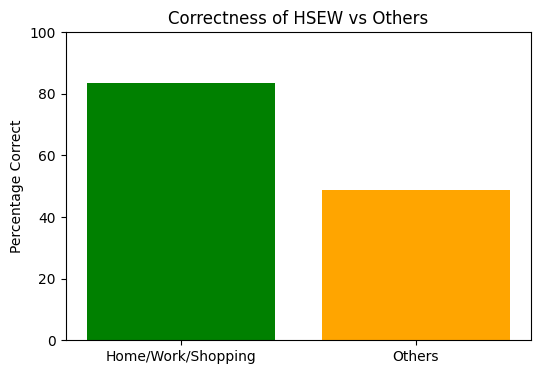

In [150]:
categories = ['Home/Work/Shopping', 'Others']
percentages = [hsew_perc_correct, others_perc_correct]

plt.figure(figsize=(6, 4))
plt.bar(categories, percentages, color=['green', 'orange'])
plt.title('Correctness of HSEW vs Others')
plt.ylabel('Percentage Correct')
plt.ylim(0, 100)
plt.show()